<a href="https://colab.research.google.com/github/tiagopessoalima/ED2/blob/main/Aula_Semana_02_(ED2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **[Merge Sort](https://www.youtube.com/watch?v=dENca26N6V4)**

É um algoritmo de ordenação que utiliza a estratégia "dividir para conquistar". Ele divide recursivamente uma lista em sublistas menores até que cada sublista contenha um único elemento ou esteja vazia (caso base) – as quais são consideradas ordenadas por definição.


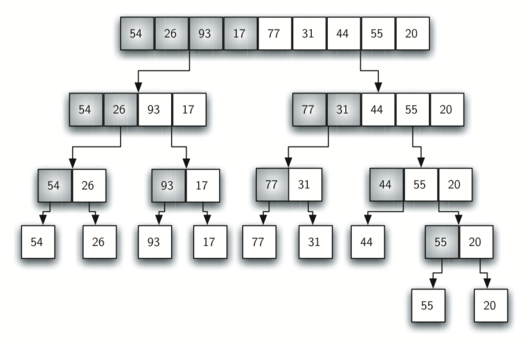

Em seguida, essas sublistas são intercaladas (merge) de forma ordenada até que se obtenha a lista final ordenada.

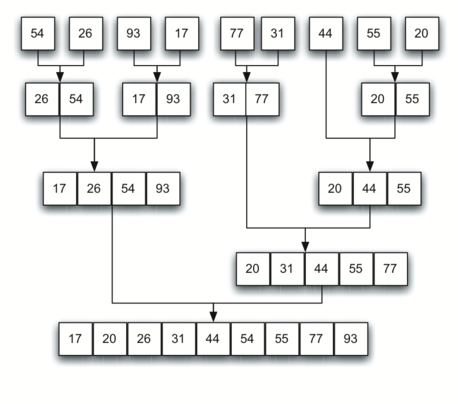

<blockquote>

**Nota:** Observe que o Merge Sort não ordena "in-place". Isso significa que ele requer memória adicional para funcionar, especificamente para armazenar as sublistas temporárias. Em cenários com grandes volumes de dados, essa demanda extra de memória pode ser um fator limitante.

</blockquote>



##**Implementações**

###**Função merge**

Combina duas listas (`esquerda` e `direita`) ordenadas em uma outra também ordenada.

In [2]:
def merge(esquerda, direita):

  resultado, indice_esquerda, indice_direita = [], 0, 0

  # Comparar elementos das duas metades e mesclar ordenadamente
  while indice_esquerda < len(esquerda) and indice_direita < len(direita):
    if esquerda[indice_esquerda] < direita[indice_direita]:
      resultado.append(esquerda[indice_esquerda])
      indice_esquerda += 1
    else:
      resultado.append(direita[indice_direita])
      indice_direita += 1

  # Adicionar os elementos restantes (se houver)
  resultado.extend(esquerda[indice_esquerda:])
  resultado.extend(direita[indice_direita:])

  return resultado

**Explicação:**

1.  **Inicialização:**
    * `resultado` é uma lista vazia que armazenará o resultado da mesclagem.
    * `indice_esquerda` e `indice_direita` são inicializados com 0, representando os índices iniciais das listas `esquerda` e `direita`, respectivamente.

2.  **Mesclagem ordenada:**
    * O loop `while` continua enquanto houver elementos em ambas as listas.
    * Dentro do loop, os elementos nas posições `indice_esquerda` e `indice_direita` são comparados.
    * O menor elemento é adicionado à lista `resultado`, e o índice correspondente é incrementado.

3.  **Adição dos elementos restantes:**
    * Após o loop `while`, pode haver elementos restantes em uma das listas.
    * `resultado.extend(esquerda[indice_esquerda:])` adiciona os elementos restantes da lista `esquerda` à lista `resultado`.
    * `resultado.extend(direita[indice_direita:])` adiciona os elementos restantes da lista `direita` à lista `resultado`.

4.  **Retorno do resultado:**
    * A função retorna a lista `resultado`, que contém todos os elementos de `esquerda` e `direita`, ordenados.


###**Função merge_sort**

Opera ao dividir uma estrutura em conjuntos menores e, em seguida, aplicar a ordenação aos elementos que foram retirados da estrutura original. Depois de ordenar esses conjuntos menores, eles são mesclados (merge) para formar um conjunto final ordenado. Em essência, o algoritmo segue o princípio "Dividir para conquistar", que é amplamente reconhecido e utilizado.

#### **Função ordenacao_merge_recursiva**

In [3]:
def ordenacao_merge_recursiva(arr):
  # Obtém o tamanho da lista
  n = len(arr)

  # Caso base: se a lista tiver 1 ou 0 elementos, ela já está ordenada
  if n <= 1:
    return arr

  # Dividir a lista ao meio
  meio = n // 2
  metade_esquerda = arr[:meio]  # Metade esquerda da lista
  metade_direita = arr[meio:] # Metade direita da lista

  # Ordenar recursivamente as duas metades
  metade_esquerda = ordenacao_merge_recursiva(metade_esquerda)
  metade_direita = ordenacao_merge_recursiva(metade_direita)

  # Combinar as duas metades ordenadas
  return merge(metade_esquerda, metade_direita)  # Retorna a lista ordenada

**Explicação em português:**

1.  **Caso base:** Se a lista `arr` tiver 0 ou 1 elemento, ela já está ordenada, então a função retorna a própria lista.

2.  **Divisão:** Caso contrário, a lista é dividida ao meio, criando duas sublistas: `metade_esquerda` e `metade_direita`.

3.  **Recursão:** A função `ordenacao_merge_recursiva` é chamada recursivamente para ordenar as duas sublistas.

4.  **Intercalação:** A função `intercalar(metade_esquerda, metade_direita)` (que você forneceu anteriormente) é chamada para combinar as duas sublistas ordenadas em uma única lista ordenada.

5.  **Retorno:** A função retorna a lista ordenada resultante.

#### **Função ordenacao_merge_iterativa**

In [ ]:
def ordenacao_merge_iterativa(arr):
  # Inicializa o tamanho da sublista como 1
  tamanho_sublista = 1

  # Continua o loop enquanto o tamanho da sublista for menor que o tamanho da lista original
  while tamanho_sublista < len(arr):
    # Percorre a lista em passos de tamanho 2 * tamanho_sublista
    for inicio in range(0, len(arr), 2 * tamanho_sublista):
      # Calcula o ponto médio da sublista
      meio = inicio + tamanho_sublista

      # Calcula o ponto final da sublista (limitado pelo tamanho da lista original)
      fim = min(inicio + 2 * tamanho_sublista, len(arr))

      # Divide a sublista atual em duas partes: [inicio:meio] e [meio:fim]
      esquerda = arr[inicio:meio]
      direita = arr[meio:fim]

      # Chama a função intercalar para mesclar as sublistas ordenadas (esquerda e direita)
      # e armazenar o resultado de volta na lista original (arr)
      arr[inicio:fim] = merge(esquerda, direita)

    # Dobra o tamanho da sublista para a próxima iteração
    tamanho_sublista *= 2

  # Retorna a lista original ordenada
  return arr

**Explicação:**

1.  **Inicialização:**
    * `tamanho_sublista` começa com 1, representando o tamanho inicial das sublistas a serem mescladas.

2.  **Loop principal:**
    * O loop `while` continua enquanto o `tamanho_sublista` for menor que o tamanho da lista `arr`. Isso garante que todas as partes da lista sejam eventualmente mescladas.

3.  **Loop interno:**
    * O loop `for` percorre a lista `arr` em passos de `2 * tamanho_sublista`. Isso permite processar pares de sublistas adjacentes.

4.  **Cálculo dos índices:**
    * `meio` calcula o ponto médio da sublista atual.
    * `fim` calcula o ponto final da sublista, garantindo que não ultrapasse o tamanho da lista `arr`.

5.  **Divisão das sublistas:**
    * `esquerda` e `direita` são criadas, representando as duas sublistas a serem mescladas.

6.  **Intercalação:**
    * A função `intercalar(esquerda, direita)` (que você forneceu anteriormente) é chamada para mesclar as sublistas `esquerda` e `direita`. O resultado é armazenado de volta na lista `arr`, na posição correta.

7.  **Incremento do tamanho da sublista:**
    * `tamanho_sublista *= 2` dobra o tamanho da sublista para a próxima iteração, garantindo que sublistas maiores sejam mescladas gradualmente.

8.  **Retorno:**
    * Após a conclusão de todos os loops, a lista `arr` estará completamente ordenada, e a função a retorna.

### **Exemplo de Uso**

In [ ]:
numeros = [64, 34, 25, 12, 22, 11, 90]
print("Lista original:", numeros)
lista_ordenada = ordenacao_merge_recursiva(numeros)
print("Lista ordenada:", lista_ordenada)

Lista original: [64, 34, 25, 12, 22, 11, 90]
Lista ordenada: [11, 12, 22, 25, 34, 64, 90]


### **Análise do Tempo**

Abaixo está o gráfico comparativo do tempo gasto pelo Selection Sort e o Merge Sort.

In [ ]:
def selection_sort(arr):
  n = len(arr)
  for i in range(n - 1):
    min_index = i
    for j in range(i + 1, n):
      if arr[j] < arr[min_index]:
        min_index = j
    arr[i], arr[min_index] = arr[min_index], arr[i]

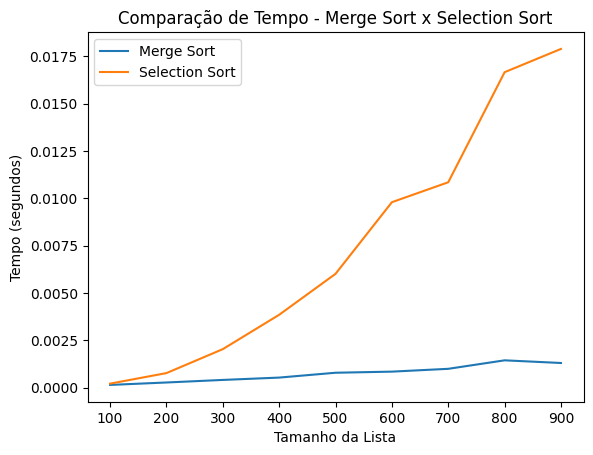

In [ ]:
import time
import matplotlib.pyplot as plt

# Gerar listas de tamanhos diferentes para a análise
list_lengths = [100, 200, 300, 400, 500, 600, 700, 800, 900]
timings_selection_sort = []
timings_merge_sort = []

for length in list_lengths:
    data = list(range(length, 0, -1))  # Lista decrescente

    start_time = time.time()
    iterative_merge_sort(data.copy())
    end_time = time.time()
    timings_merge_sort.append(end_time - start_time)

    start_time = time.time()
    selection_sort(data.copy())
    end_time = time.time()
    timings_selection_sort.append(end_time - start_time)

# Plotar os resultados
plt.plot(list_lengths, timings_merge_sort, label='Merge Sort')
plt.plot(list_lengths, timings_selection_sort, label='Selection Sort')
plt.xlabel('Tamanho da Lista')
plt.ylabel('Tempo (segundos)')
plt.title('Comparação de Tempo - Merge Sort x Selection Sort')
plt.legend()
plt.show()

### **Análise do Consumo de Memória**

Abaixo está o gráfico comparativo do consumo de memória gasto pelo Selection Sort e o Merge Sort.

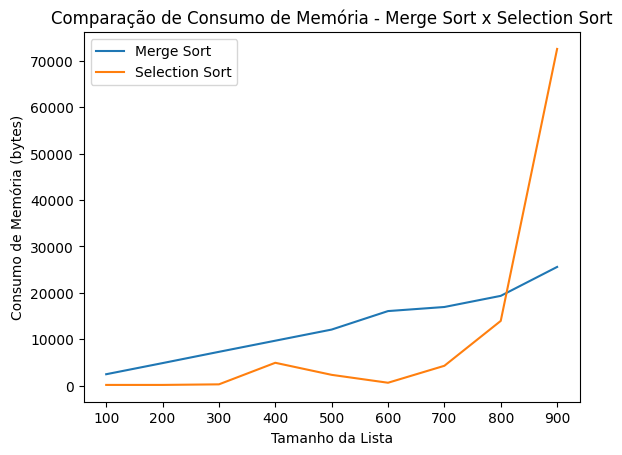

In [ ]:
import tracemalloc

def measure_memory_usage(func, *args):
    tracemalloc.start()
    func(*args)
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak

list_lengths = [100, 200, 300, 400, 500, 600, 700, 800, 900]
memory_usage_selection_sort = []
memory_usage_merge_sort = []

for length in list_lengths:
    data = list(range(length, 0, -1))  # Lista decrescente

    # Medir o consumo de memória para o Merge Sort
    memory_merge_sort = measure_memory_usage(iterative_merge_sort, data.copy())
    memory_usage_merge_sort.append(memory_merge_sort)

    # Medir o consumo de memória para o Selection Sort
    memory_selection_sort = measure_memory_usage(selection_sort, data.copy())
    memory_usage_selection_sort.append(memory_selection_sort)

# Plotar os resultados de consumo de memória
plt.plot(list_lengths, memory_usage_merge_sort, label='Merge Sort')
plt.plot(list_lengths, memory_usage_selection_sort, label='Selection Sort')
plt.xlabel('Tamanho da Lista')
plt.ylabel('Consumo de Memória (bytes)')
plt.title('Comparação de Consumo de Memória - Merge Sort x Selection Sort')
plt.legend()
plt.show()

O consumo total de memória para o Selection Sort é relativamente baixo em comparação com o Merge Sort. Isso ocorre porque o Selection Sort é um algoritmo de ordenação de complexidade quadrática $(O(n^2))$ que não requer muitas estruturas de dados adicionais.

### **Complexidade**

Precisamos considerar os dois processos distintos que compõem sua implementação:

- Primeiro, a lista é dividida em metades:

 Se começarmos com $n$ itens, em torno de $n/2$ itens sobrarão após a primeira divisão. Depois da segunda divisão, haverá $n/4$, depois $n/8$, $n/16$ e assim por diante. A tabela abaixo mostra quantas vezes é possível dividir a lista.

 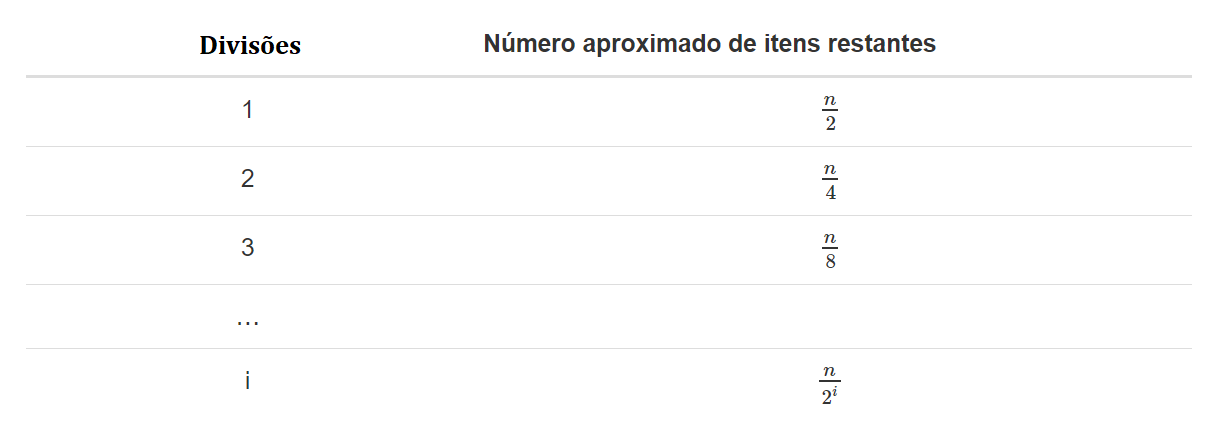

 Quando divide-se a lista um número suficiente de vezes, acaba-se ficando com uma lista composta por um único item. O número necessário de divisões para chegar a este ponto é $i$, onde $n/2^{i} = 1$. Isolando $i$, fica-se com $i=log n$. Assim o número máximo de divisões é o logaritmo do número de itens na lista. Portanto, $O(logn)$.

- Segundo, a intercalação:
  
 Cada item será processado e colocado na lista ordenada. Essa  operação, que resulta numa lista de tamanho $n$, requer $n$ operações.

- Finalmente:

 O resultado é: $logn$ divisões, cada qual custando $n$, totalizando $nlogn$ operações. Logo, o merge sort é um algoritmo $O(nlogn)$.

### **Análise do uso de Memória**

O algoritmo Merge Sort emprega um array auxiliar (`result`) durante o processo de ordenação. A dimensão desse array auxiliar é equivalente à do array original. Em termos de consumo de memória, o Merge Sort possui uma complexidade $O(n)$. Isso marca o início de nossa exploração de algoritmos de ordenação que demandam memória auxiliar em proporção ao tamanho da tarefa em questão.



```
O Merge Sort não é in-place.
```



É essencial destacar que a característica de estabilidade está presente na ordenação, pois preserva a sequência dos elementos que possuem valores idênticos. Isso é resultado da determinação de que, se o elemento situado mais à esquerda for menor ou igual ao elemento mais à direita, ele será posicionado em primeiro lugar no array ordenado.



```
O Merge Sort é estável.
```



### **Exercícios**

1. Dada a seguinte lista de números: [21, 1, 26, 45, 29, 28, 2, 9, 16, 49, 39, 27, 43, 34, 46, 40], qual resposta mostra a lista que deveria ser ordenada depois de 3 chamadas recursivas do merge sort?

  A. [16, 49, 39, 27, 43, 34, 46, 40]

  B. [21,1]

  C. [21, 1, 26, 45]

  D. [21]

2. Dada a seguinte lista de números: [21, 1, 26, 45, 29, 28, 2, 9, 16, 49, 39, 27, 43, 34, 46, 40], qual resposta exibe as duas primeiras listas a serem intercaladas.

  A. [21, 1] e [26, 45]
  
  B. [[1, 2, 9, 21, 26, 28, 29, 45] e [16, 27, 34, 39, 40, 43, 46, 49]
  
  C. [21] e [1]
  
  D. [9] e [16]